In [2]:
import pandas as pd
from vector_auto_regression import VectorAutoRegressor, adfuller_test
import matplotlib.pyplot as plt

### Import Consumer Confidence Index

In [3]:
cgi = pd.read_csv("data/consumer_confidence_index.csv", parse_dates=['TIME'], index_col='TIME', usecols = ['TIME', 'Value'])
cgi.index = cgi.index.to_period("M")

### Apply VAR to housing data (direct)

In [4]:
forecast_period = pd.period_range(start="%d-1" % 2002, end="%d-12" % 2020, freq='M')

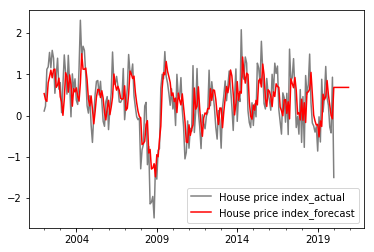

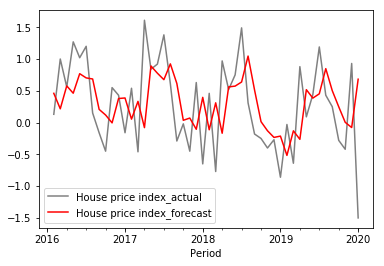

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 12, Apr, 2020
Time:                     21:44:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -5.89135
Nobs:                     190.000    HQIC:                  -5.99302
Log likelihood:           46.7166    FPE:                 0.00232922
AIC:                     -6.06224    Det(Omega_mle):      0.00221131
--------------------------------------------------------------------
Results for equation House price index
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.120980         0.046243            2.616           0.009
L1.House price index         0.529775         0.072391            7.318           0.000
L1.Value            

In [7]:
var_direct = VectorAutoRegressor(housing_index="data/real_estate_data/direct/england.csv", sentiment_index = cgi, housing_column = "House price index")
var_direct.fit_model(lag_order = 2)

#Forecast of whole dataset
var_direct.forecast_period(forecast_period)

# Forecast of test set
var_direct.forecast_period(var_direct.test_data.index)

var_direct.fit.summary()

### Apply VAR to housing data (Securitzed)

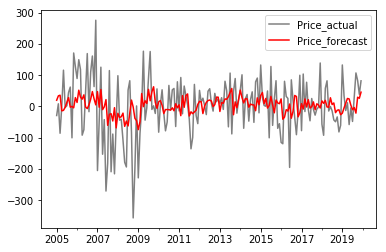

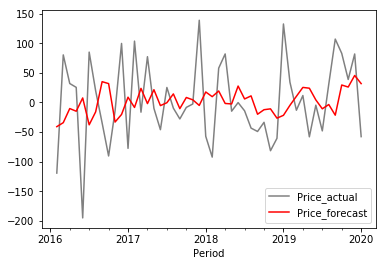

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 10, Apr, 2020
Time:                     22:18:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    4.39478
Nobs:                     166.000    HQIC:                   4.23886
Log likelihood:          -800.070    FPE:                    62.3287
AIC:                      4.13232    Det(Omega_mle):         57.3868
--------------------------------------------------------------------
Results for equation Price
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            3.907272         7.144587            0.547           0.584
L1.Price         0.091556         0.079031            1.158           0.247
L1.Value       193.877222        85.085638            2.279           0.023
L2.P

In [5]:
securitized_data = 'data/real_estate_data/securitized/FTSE EPRA_NAREIT UK Historical Data.csv'
var_securitized = VectorAutoRegressor(housing_index=securitized_data, sentiment_index = cgi, housing_column = "Price", date_format="%b %y")
forecast_period = pd.period_range(start="%d-1" % 2005, end="%d-12" % 2019, freq='M')

#var_securitized.test_lags()
var_securitized.fit_model(lag_order = 3)

#Forecast of whole dataset
var_securitized.forecast_period(forecast_period)

# Forecast of test set
var_securitized.forecast_period(var_direct.test_data.index)

var_securitized.fit.summary()